# a

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# load data
df = pd.read_csv('/Users/sjx/Desktop/CS5785/ass1/digit/train.csv')
train_array = df.values.reshape((-1, 785))
print(train_array.shape)

digits = []
labels = df['label']
for i in range(labels.unique().shape[0]):
    digits.append(df.loc[df['label'] == i].iloc[:, 1:])
    print(len(digits[i]))

print(len(digits))

# print(digits[0].iloc[0, :])
# print(type(digits[0].iloc[0, :]))
# Name: 1, Length: 784, dtype: int64
# <class 'pandas.core.series.Series'>

(42000, 785)
4132
4684
4177
4351
4072
3795
4137
4401
4063
4188
10


In [3]:
zeros = []
ones = []

for i in range(0, train_array.shape[0]):
    row = train_array[i]
#     labels.append(row[0])
    if row[0] == 0:
        zeros.append(row)
    elif row[0] == 1:
        ones.append(row)

zeros = np.asarray(zeros).reshape(-1, 785)
ones = np.asarray(ones).reshape(-1, 785)
print(zeros.shape)
print(ones.shape)

(4132, 785)
(4684, 785)


# b

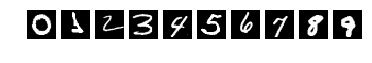

In [4]:
def display_digits(digit_list):
    for i in range(len(digit_list)):
        pixel_array = digit_list[i].values.reshape(28,28)   
        plt.subplot(len(digit_list)/len(digits), len(digits), i+1)
        plt.imshow(pixel_array, cmap='gray')
        plt.axis("off")

examples = []
for i in range(len(digits)):
    examples.append(digits[i].iloc[i*10,:])
display_digits(examples)   


# c

[0.11152380952380953, 0.09838095238095237, 0.09695238095238096, 0.10478571428571429, 0.1035952380952381, 0.09035714285714286, 0.09673809523809523, 0.09971428571428571, 0.09945238095238096, 0.0985]


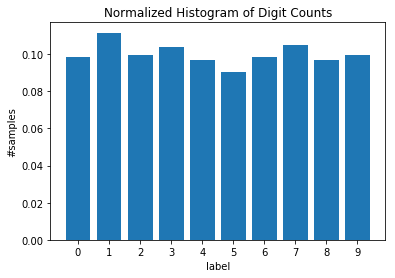

In [5]:
from collections import Counter
counter = Counter(labels)
ppb = []
for i in range(len(digits)):
    ppb.append(list(counter.values())[i]/len(labels))
print(ppb)

plt.hist(labels, 10, density = True, align = 'left', range=(0,10), rwidth=0.8)
plt.xlabel('label')
plt.ylabel('#samples')
plt.title('Normalized Histogram of Digit Counts')
plt.xticks(np.arange(0, 10, step=1))
plt.show()

# d

In [6]:
def best_match(eg_series):
    dist = float("inf")
    label = -1
    idx = -1
    for i in range(0, len(labels)):
        eg_row = eg_series.values
        pixel_row = df.iloc[i,1:].values
        label_temp = df.iloc[i,0]
#         dist_temp = math.sqrt(sum([(a - b) ** 2 for a, b in zip(eg_row, pixel_row)]))
        dist_temp = np.linalg.norm(eg_row - pixel_row)
        if dist_temp < dist and dist_temp > 0.0:
            dist = dist_temp
            label = label_temp
            idx = i
    return (idx, label, dist)

best_matches = []
for i in range(len(examples)):
    best_idx, best_label, best_dist = best_match(examples[i])
    best_matches.append(df.iloc[best_idx,1:])
    print(best_idx, best_label, best_dist)

# display_digits(best_matches)

12950 0 1046.5954328201515
40339 1 1257.0787564826637
27826 2 1210.1371823062045
21320 3 1549.2294859058163
17891 4 980.6125636560038
900 5 1376.716746466026
20211 6 709.3609800376674
39434 7 710.1063300661388
4167 8 1119.3364105576125
33307 9 816.7649600711333


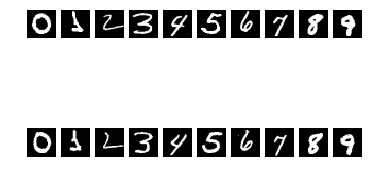

In [7]:
display_digits(examples+best_matches)

# e

In [8]:
# used array, df too slow

from sklearn.metrics.pairwise import euclidean_distances
from sklearn import preprocessing

genuines = []
imposters = []
for i in range(0, zeros.shape[0]):
    for j in range(i+1, zeros.shape[0]):
        dist = np.linalg.norm(zeros[i] - zeros[j])
        genuines.append(dist)
print("Done.")
        
for i in range(0, ones.shape[0]):
    for j in range(i+1, ones.shape[0]):
        dist = np.linalg.norm(ones[i] - ones[j])
        genuines.append(dist)
print("Done.")

for i in range(0, zeros.shape[0]):
    for j in range(0, ones.shape[0]):
        dist = np.linalg.norm(zeros[i] - ones[j])
        imposters.append(dist)
print("Done.")

# dist = np.linalg.norm(digits[0].iloc[i, :].values - digits[0].iloc[j, :].values)
# genuine_normalized = preprocessing.normalize(genuines.reshape(1, -1), norm='l2')       
# imposter_normalized = preprocessing.normalize(imposters.reshape(1, -1), norm='l2')

print(len(genuines))
print(len(imposters))

Done.
Done.
Done.
19502232
19354288


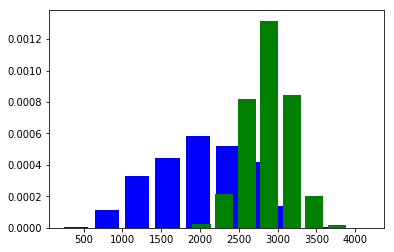

In [9]:
# plt.hist(genuine0, density = True, rwidth=0.8, color='r', label='genuine0')
# plt.hist(genuine1, density = True, rwidth=0.8, color='g', label='genuine1')
# plt.hist(imposter, density = True, rwidth=0.8, color='b', label='imposter')

plt.hist(genuines, density = True, rwidth=0.8, color='b', label='genuines')
plt.hist(imposters, density = True, rwidth=0.8, color='g', label='imposters')
plt.show()

# f

In [10]:
from sklearn.metrics import roc_curve, auc
dist_binary = genuines + imposters
label_binary = [1]*len(genuines) + [0]*len(imposters)

fpr, tpr, _ = roc_curve(label_binary, dist_binary, pos_label=0)    #why????

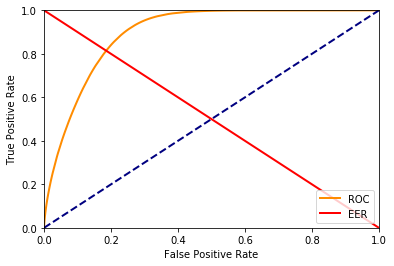

In [11]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.plot([0, 1], [1, 0], color='r', lw=2, label='EER')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# g

In [12]:
from sklearn.metrics.pairwise import euclidean_distances
from collections import Counter

def knn(k, test_array, train_array):
    y_pred = []
    y_train = train_array[:, 0].flatten()
    dists = euclidean_distances(test_array, train_array[:, 1:])
#     dists = np.sqrt(-2 * np.dot(X, self.X_train.T) + np.matrix(np.square(X).sum(axis = 1)).T + np.square(self.X_train).sum(axis = 1))
    
    for i in range(dists.shape[0]):
        labels = y_train[np.argsort(dists[i, :])].flatten()
        first_k = [x for x in labels[:k]]
        predicted = Counter(first_k).most_common(1)
        y_pred.append(predicted)
    return y_pred

print(knn(5, zeros[0:3, 1:], train_array))

[[(0, 5)], [(0, 5)], [(0, 5)]]


In [ ]:
# deprecated, point-wise too slow

from collections import Counter
def knn(k, test_row, train_array):
    dists = []
    time = 0
    for i in range(train_array.shape[0]):
        dist = np.linalg.norm(test_row - train_array[i][1:])
        dists.append((dist, train_array[i][0]))
#     print(dists)
    dists.sort()
    first_k = [x[1] for x in dists[:k]]
    predicted = Counter(first_k).most_common(1)
    return predicted

# print(knn(5, zeros[0][1:], train_array))
            

# h

In [13]:
import time
split = [[], [], []]

for i in range(0, train_array.shape[0]):
    split[i%3].append(train_array[i])
for i in range(0,3):
    j = (i+1)%3
    k = (i+2)%3

    test = np.asarray(split[i]).reshape(-1, 785)
    train = np.asarray(split[j] + split[k]).reshape(-1, 785)
    
    X_test = [x[1:] for x in test]
    y_test = [x[0] for x in test]
    
    count = 0
    correct = 0
    y_pred = []
    accs = []
    
    start = time.time()
    predicted = knn(5, X_test, train)
    for i in range(len(predicted)):
        y_pred.append(predicted[i][0][0])
        if predicted[i][0][0] == y_test[i]:    #bc predicted is nested list with tuples (actually one tuple, duh)
            correct = correct + 1
    end = time.time()
    print("time: " + format(end - start, '.2f') + "s")
    acc = correct/len(X_test)
    print("acc: " + str(acc))
    accs.append(acc)
    
avg_acc = sum(accs)/len(accs)
print("avg_acc: " + str(avg_acc))

time: 67.63s
acc: 0.9658571428571429
time: 48.44s
acc: 0.966
time: 45.88s
acc: 0.9664285714285714
avg_acc: 0.9664285714285714


In [ ]:
# do external libs allowed in this step tho lol?
# deprecated, point-wise too slow

split = [[], [], []]

for i in range(0, train_array.shape[0]):
    split[i%3].append(train_array[i])
for i in range(0,3):
    j = (i+1)%3
    k = (i+2)%3

    test = np.asarray(split[i]).reshape(-1, 785)
    train = np.asarray(split[j] + split[k]).reshape(-1, 785)
    
    # train, test = train_test_split(train_array, test_size=0.00033)
    X_test = [x[1:] for x in test]
    y_test = [x[0] for x in test]
    print(len(X_test))

    count = 0
    correct = 0
    y_pred = []
    accs = []
    for i in range(0, len(X_test)):
        predicted = knn(50, X_test[i], train)
        y_pred.append(predicted)
        count = count + 1
        if predicted[0][0] == y_test[i]:
            correct = correct + 1
        print(count, y_test[i], predicted, correct)
        
    acc = correct/len(X_test)
    print("acc: " + str(acc))
    accs.append(acc)

avg_acc = sum(accs)/len(accs)
print("avg_acc: " + str(avg_acc))

# i

Normalized confusion matrix
[[9.92e-01 0.00e+00 7.41e-04 0.00e+00 7.41e-04 7.41e-04 5.93e-03 0.00e+00
  0.00e+00 0.00e+00]
 [0.00e+00 9.96e-01 0.00e+00 6.20e-04 0.00e+00 0.00e+00 6.20e-04 2.48e-03
  0.00e+00 0.00e+00]
 [8.66e-03 8.66e-03 9.54e-01 3.61e-03 1.44e-03 7.22e-04 1.44e-03 1.88e-02
  2.89e-03 0.00e+00]
 [1.37e-03 1.37e-03 6.87e-03 9.62e-01 0.00e+00 1.37e-02 0.00e+00 5.49e-03
  4.81e-03 4.12e-03]
 [0.00e+00 7.49e-03 0.00e+00 0.00e+00 9.58e-01 0.00e+00 4.49e-03 3.00e-03
  0.00e+00 2.70e-02]
 [2.33e-03 7.76e-04 0.00e+00 1.24e-02 0.00e+00 9.62e-01 1.01e-02 2.33e-03
  2.33e-03 7.76e-03]
 [5.05e-03 2.16e-03 0.00e+00 7.21e-04 7.21e-04 4.33e-03 9.87e-01 0.00e+00
  0.00e+00 0.00e+00]
 [7.07e-04 1.34e-02 3.54e-03 0.00e+00 3.54e-03 0.00e+00 0.00e+00 9.65e-01
  0.00e+00 1.41e-02]
 [2.97e-03 1.26e-02 2.23e-03 2.00e-02 3.71e-03 1.71e-02 5.19e-03 2.97e-03
  9.23e-01 1.04e-02]
 [1.41e-03 2.11e-03 0.00e+00 7.03e-03 1.19e-02 0.00e+00 7.03e-04 1.48e-02
  2.11e-03 9.60e-01]]


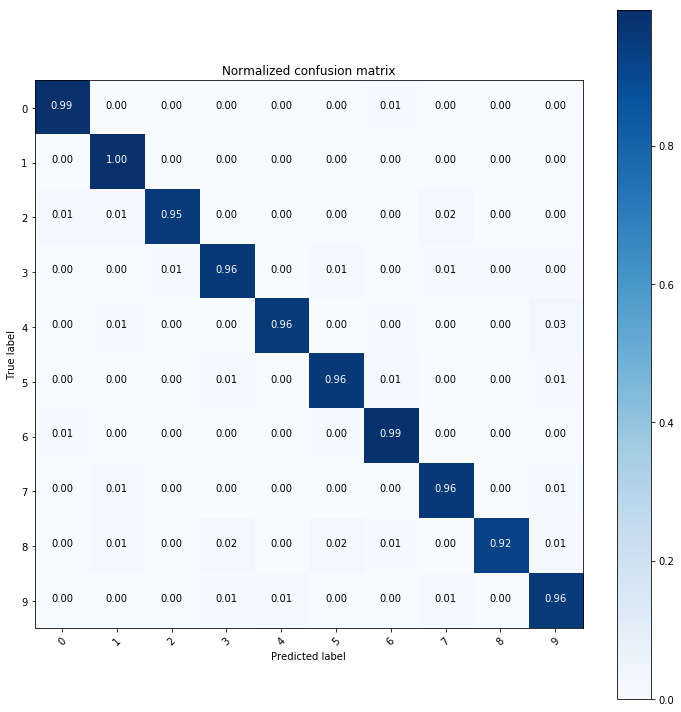

In [14]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.gcf().set_size_inches(10, 10)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=list(range(10)), normalize=True, title='Normalized confusion matrix')

plt.show()

# j

In [15]:
df = pd.read_csv('/Users/sjx/Desktop/CS5785/ass1/digit/test.csv')
test_array = df.values.reshape((-1, 784))
print(test_array.shape)

y_pred = []

start = time.time()
predicted = knn(5, test_array, train_array)
for i in range(len(predicted)):
    y_pred.append(predicted[i][0][0])
end = time.time()
print("time: " + format(end - start, '.2f') + "s")
 
#save to file
output = {'ImageID': list(range(1, test_array.shape[0]+1)),
         'Label': y_pred}
# print(output)
df = pd.DataFrame(output, columns = ['ImageID', 'Label'])
df.to_csv('mnist_matrix_out.csv')
print("Out to file.")

(28000, 784)
time: 564.48s
Out to file.
